# Certificate in Data Science | Assignment 3 |  
- Monty Hall Simulation

> University of Washington  
> July 2019  
> N. HICKS

## Instructions
Simulate the conditional probabilities of the distributions for winning a car vs. a goat for the Monty Hall Problem that includes the following:
1. the cases for switching or not switching
2. histograms and summary statistics (at least mean and variance) of the results for winning the car or a goat for both strategies: switching or not switching
3. comparison of the cases to determine the best strategy
4. recommended strategy



Note:  
Please clearly outline the results and your recommendation with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
# Import libraries
from __future__ import division 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# establish JN inline plotting results
%matplotlib inline
sns.set()

In [2]:
# define a function to update this notebooks theme parameters
def updateTheme(figArea):
    try:
        from jupyterthemes import jtplot
        # choose which theme to inherit plotting style from:
        # onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
        themeChoice = 'onedork'
        jtplot.style(theme=themeChoice)

        # set "context" from:
        # paper | notebook | talk | poster
        # scale font-size of ticklabels, legend, etc.
        # remove spines from x and y axes and make grid dashed
        jtplot.style(context='notebook', fscale=1.6, spines=False, gridlines='--')

        # turn on X- and Y-axis tick marks (default=False)
        # turn off the axis grid lines (default=True)
        # and set the default figure size
        jtplot.style(ticks=True, grid=False, figsize=figArea)

        # Set the palette using the name of a palette:
        # deep | muted | pastel | bright | dark | colorblind
        sns.set_palette("pastel")

    except ImportError:
        sns.set()

In [3]:
# apply updated theme to JN environment
updateJNTheme = False     # update existing Jupyter Notebook theme or not
# define the area of the resultant plots
figArea = (25, 15)
    
if updateJNTheme == True:
    updateTheme(figArea)
else:
    sns.set()

## Establish Model to Process the Conditional Probabilities

In [4]:
# if the first choice is a door with a goat behind it...
def goatFirst(choice):
    pGoat_0 = 2/3
    # probability(picked goat then switched and won car)
    if choice == 'switch':
        pCar = 1
    # probability(picked goat then did not switch then won car)
    if choice == 'stay':
        pCar = 0
    pPrize = pCar * pGoat_0
    return pPrize

# if the first choice is a dorr with a car behind it...
def carFirst(choice):
    pCar_0 = 1/3
    # probability(picked car then switched and won car)
    if choice == 'switch':
        pCar = 0
    # probability(picked car then did not switch then won car)
    if choice == 'stay':
        pCar = 1
    pPrize = pCar * pCar_0
    pPrize_1, pPrize_2 = hostOptions(pPrize)
    return pPrize_1, pPrize_2

In [5]:
# for when the host offers alternative doors to choose,
# when you have already selected the car on the first choice, and only the host knows this fact
def hostOptions(pPrize):
    pChoice = 1/2
    pPrize_1 = pPrize * pChoice
    pPrize_2 = pPrize_1
    return pPrize_1, pPrize_2

## Test the Model for Proper Outcomes  
- Validate that after the first door chosen, the probabilities add to unity.  
- The result shows that the contestant has best probability of winning the car by switching doors when presented with the option to do so.  
- (Recommendation) By using a switching strategy, the proability of winning is 2/3.  
---
  ***NOTE***: REF below table, where:  
  - ROW-1 shows the probabilities of the ***FIRST*** door choice  
  - ROW-2 shows the probabilities of the ***SECOND*** door choice  
  
  From the table, it is seen that the probability of winning the car, is the least probable outcome at only 17%, where by using a switching strategy, this probability is much improved at 67%.

In [6]:
print('****************************')
print('VALIDATION of INITIAL CHOICE')
print('****************************\n')
choice = 'switch'
pWin_A = goatFirst(choice)
print('First Door: Goat\nFinal Door: Switch Doors\nP(Win Car): '
      + str(round(pWin_A*100,1)) + '%\n\n')

choice = 'stay'
pWin_B = goatFirst(choice)
print('First Door: Goat\nFinal Door: Do Not Switch Doors\nP(Win Car): '
      + str(round(pWin_B*100,1)) + '%\n\n')

choice = 'switch'
pWin_C1, pWin_C2 = carFirst(choice)
pWin_C = pWin_C1 + pWin_C2
print('First Door: Car\nFinal Door: Switch Doors\nP(Win Car): '
      + str(round(pWin_C*100,1)) + '%\n\n')

choice = 'stay'
pWin_D1, pWin_D2 = carFirst(choice)
pWin_D = pWin_D1 + pWin_D2
print('First Door: Car\nFinal Door: Do Not Switch Doors\nP(Win Car): '
      + str(round(pWin_D*100,1)) + '%')

print('\n---------------------------------------')
print('Total probability: | Goat-Switch | Goat-Stay | Car-Switch |  Car-Stay  |\n       ' + str(pWin_A+pWin_B+pWin_C+pWin_D) + '         |    '
      + str(np.round(pWin_A, 2)) + '     |    ' + str(pWin_B) + '    |    ' + str(pWin_C) + '     |    ' + str(np.round(pWin_D, 2)) + '    |\n       '
      + str(np.round(pWin_A+pWin_B+pWin_C1+pWin_C2+pWin_D1+pWin_D2, 2)) + '         |    '
      + str(np.round(pWin_A, 2)) + '     |    ' + str(pWin_B) + '    |    ' + str(pWin_C1+pWin_C2) + '     | ' + str(np.round(pWin_D1, 2))
      + '  ' + str(np.round(pWin_D2, 2)) + ' |')

****************************
VALIDATION of INITIAL CHOICE
****************************

First Door: Goat
Final Door: Switch Doors
P(Win Car): 66.7%


First Door: Goat
Final Door: Do Not Switch Doors
P(Win Car): 0.0%


First Door: Car
Final Door: Switch Doors
P(Win Car): 0.0%


First Door: Car
Final Door: Do Not Switch Doors
P(Win Car): 33.3%

---------------------------------------
Total probability: | Goat-Switch | Goat-Stay | Car-Switch |  Car-Stay  |
       1.0         |    0.67     |    0.0    |    0.0     |    0.33    |
       1.0         |    0.67     |    0.0    |    0.0     | 0.17  0.17 |


## Establish a Bernoulli Distribution  
- A Bernoulli distribution model provides the outcome of trials or experiments with binary results.  
- For an event with a binary outcome, 0 or 1, a probability 𝑝 of state 1 is derived.

In [7]:
 def reportSummary(choice, pick):
    bern_sample_mean = bern_samples.sum() / bern_samples.size
    # Note: there's also a built-in for mean: `bern_samples.mean()`

    # define the sample variance
    sampVar = (1-bern_sample_mean)
    # The expected mean is `p`
    print('First Pick: ' + pick + '\nSecond Pick: ' + choice)
    print('-------------------------------------------------')
    print('   p = %.3f              variance = %.3f\n   Sample mean = %.3f    Sample variance = %.3f' % (p, var, bern_sample_mean, sampVar))

In [8]:
# execute a Bournoulli distribution of the Monty Hall conditional probility problem statement
pick_A = ['goat', 'car']
pick_B = ['switch', 'stay']     # | 'yesSwitch' | 'noSwitch' |
n = 1000     # the number of realizations
print('*************************************************')
print('MONTY HALL SIMULATION RESULTS - SUMMARY STATISTIC')
print('*************************************************\n')
for pick in pick_A:
    if pick=='goat':
        for prize in pick_B:
            p = goatFirst(prize)
            var = (1-p)
            # Compute `n` random draws
            bern_samples = np.random.binomial(1, p, n)
            reportSummary(prize, pick)
            print('\n')
    if pick=='car':
        for prize in pick_B:
            p1, p2 = carFirst(prize)
            p = p1+p2
            var = (1-p)
            # Compute `n` random draws
            bern_samples = np.random.binomial(1, p, n)
            reportSummary(prize, pick)
            print('\n')

*************************************************
MONTY HALL SIMULATION RESULTS - SUMMARY STATISTIC
*************************************************

First Pick: goat
Second Pick: switch
-------------------------------------------------
   p = 0.667              variance = 0.333
   Sample mean = 0.655    Sample variance = 0.345


First Pick: goat
Second Pick: stay
-------------------------------------------------
   p = 0.000              variance = 1.000
   Sample mean = 0.000    Sample variance = 1.000


First Pick: car
Second Pick: switch
-------------------------------------------------
   p = 0.000              variance = 1.000
   Sample mean = 0.000    Sample variance = 1.000


First Pick: car
Second Pick: stay
-------------------------------------------------
   p = 0.333              variance = 0.667
   Sample mean = 0.339    Sample variance = 0.661




In [9]:
def plotHisto(data, pick, prize):
    plt.hist(data)
    plt.title('choose ' + pick.upper() + ', then ' + prize.upper())
    plt.ylabel('Counts')
    plt.xlabel('Bernoulli Outcome\nWin Goat = 0.0\nWin Car = 1.0')

## Establish Data Visualization of the Bernoulli Modeling
- Using 1,000 realizations, the histogram plots below show clearly the resultant distributions per the Bernoulli model of game show progression.  
- Given 2 opportunities to choose from 3 total doors will result in a 0.0% probability outcome in 2 of the 4 combinations (as shown in the 2 middle histograms:  
      A) Choosing a goat first, then not switching doors on the next opportunity, and  
      B) Choosing the car first, then switching doors at the next opportunity.  
   
- The remaining 2 outcomes as reflected in the histograms, shows larger frequency occurance for choosing a new door (switching) when the opportunity presents itself:  
      A) If the first door has the car behind it and a switch is chosen, then winning a goat is ensured.  
      B) If the goat is chosen and then the doors are switched, the probability of winning the car is largest of all outcomes.  
- The highest likelihood of winning the car is by using a switching strategy.

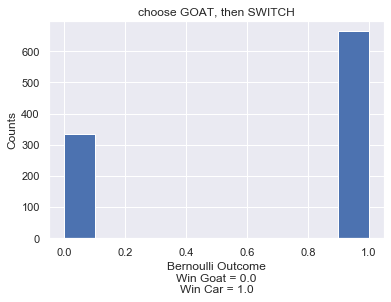

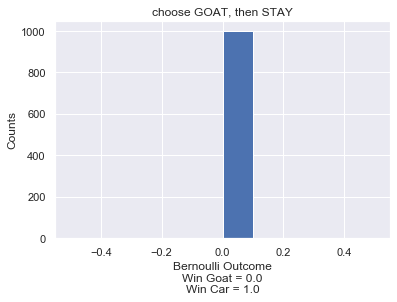

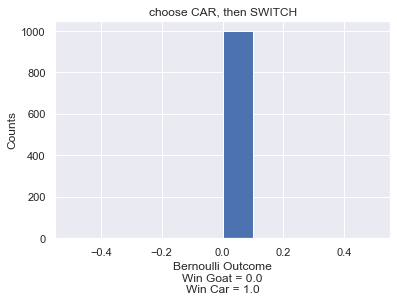

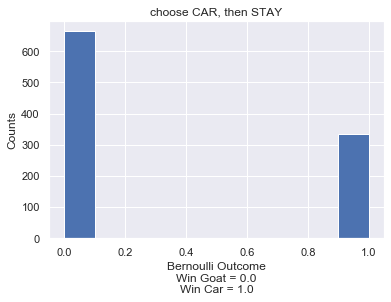

In [10]:
pick_A = ['goat', 'car']
pick_B = ['switch', 'stay']     # | 'yesSwitch' | 'noSwitch' |
n = 1000     # the number of realizations
for pick in pick_A:
    if pick=='goat':
        for prize in pick_B:
            p = goatFirst(prize)
            # Compute `n` random draws
            bern_samples = np.random.binomial(1, p, n)
            plotHisto(bern_samples, pick, prize)
            plt.show()
            print('\n')
    if pick=='car':
        for prize in pick_B:
            p1, p2 = carFirst(prize)
            p = p1+p2
            # Compute `n` random draws
            bern_samples = np.random.binomial(1, p, n)
            plotHisto(bern_samples, pick, prize)
            plt.show()
            print('\n')